In [350]:
import fitz as fz
import re
import pandas as pd
from textblob import TextBlob, Word


In [351]:
doc = fz.open("Curriculum Rubén Facundo López data.pdf")

quitar caracteres en texto

In [352]:
texto = doc.get_page_text(0).replace("\n", " ").replace("\xa0", "").replace("<","").replace(">","")

convertir a TextBlob

In [353]:
blob = TextBlob(texto)

lista de palabras unicas

In [354]:
blob.words

WordList(['Academic', 'training', 'Personal', 'information', 'Title', 'Professional', 'Electronic', 'Technician', 'Employment', 'Background', 'Name', 'Lopez', 'Ruben', 'Facundo', 'My', 'ecosystem', 'as', 'a', 'Data', 'Scientist', 'DNI', '38.745.780', 'Incomplete', 'Driving', 'license', 'B1', '•', 'Cell', 'phone/WhatsApp', '54', '381', '4', '194', '675', '•', 'Email', 'facu.lopez.22', 'hotmail.com', 'Argentina', 'Nationality', 'For', 'my', 'contact', 'University', 'Information', 'Systems', 'Engineering', 'National', 'Technological', 'University', 'Province', 'Tucuman', 'Secondary', 'Obispo', 'Colombres', 'Technical', 'School', 'No', '2', 'complete', 'Birth', 'March', '22', '1995', 'City', 'San', 'Miguel', 'de', 'Tucuman', 'Address', 'Lavalle', '1171', '3B', 'Curriculum', 'vitae', 'data', 'exploration', '–', 'text', 'management', '–', 'Web', 'scraping', 'with', 'Beautifful', 'Extraction', 'transformation', 'and', 'load', 'ETL', 'Testing', 'Monitoring', 'Alerts', '–', 'Pipelines', 'Data',

Quitar las palabras con "nltk"

In [355]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lopez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


lista de palabras a quitar en ingles y español

In [356]:
stops_es = stopwords.words("spanish")
stops_en = stopwords.words("english")
stops = stops_en + stops_es

reducir el texto y normalizar en minuscula

In [357]:
texto_reducido = [word for word in blob.words if word not in stops]
texto_reducido = [palabra.lower() for palabra in texto_reducido]
texto_reducido

['academic',
 'training',
 'personal',
 'information',
 'title',
 'professional',
 'electronic',
 'technician',
 'employment',
 'background',
 'name',
 'lopez',
 'ruben',
 'facundo',
 'my',
 'ecosystem',
 'data',
 'scientist',
 'dni',
 '38.745.780',
 'incomplete',
 'driving',
 'license',
 'b1',
 '•',
 'cell',
 'phone/whatsapp',
 '54',
 '381',
 '4',
 '194',
 '675',
 '•',
 'email',
 'facu.lopez.22',
 'hotmail.com',
 'argentina',
 'nationality',
 'for',
 'contact',
 'university',
 'information',
 'systems',
 'engineering',
 'national',
 'technological',
 'university',
 'province',
 'tucuman',
 'secondary',
 'obispo',
 'colombres',
 'technical',
 'school',
 'no',
 '2',
 'complete',
 'birth',
 'march',
 '22',
 '1995',
 'city',
 'san',
 'miguel',
 'tucuman',
 'address',
 'lavalle',
 '1171',
 '3b',
 'curriculum',
 'vitae',
 'data',
 'exploration',
 '–',
 'text',
 'management',
 '–',
 'web',
 'scraping',
 'beautifful',
 'extraction',
 'transformation',
 'load',
 'etl',
 'testing',
 'monitoring

listado de palabras a buscar en el texto_reducido

In [358]:
herramientas= ['sql', 'dml', 'orm', 'kpi', 'kpis', 'probability', 'logica', 'distribuciones', 'estadistica', 'cleansing', 'etl', 'testing', 'pipelines', 'warehouse', 'hadoop', 'big', 'data', 'hive', 'nosql', 'spark', 'flujos', 'oral', 'expression', 'slideware', 'viz', 'storytelling', 'story', 'telling', 'tableau', 'dashboards', 'excel', 'python', 'numpy', 'pandas', 'hdfs', 'mongodb', 'cassandra', 'map', 'reduce', 'R', 'sas', 'rapid', 'miner', 'kafka', 'storm', 'pig', 'airflow', 'kubernetes', 'git', 'jupyter', 'notebook', 'scientist', 'data', 'web', 'scraping', 'beautifful', 'transformation', 'extraction', 'load', 'testing', 'pipelines', 'warehouse', 'nosql', 'spark', 'streaming', 'github', 'big', 'hadoop', 'cleansing', 'machine', 'learning', 'deep', 'frameworks', 'hive', 'microsoft', 'office', 'word', 'queries', 'tigger', 'modeling', 'design', 'power', 'bi']

#### comenzando a crear el dataframe para entrenar el modelo

convertir a dataframe

In [359]:
df_herramientas = pd.DataFrame(columns=herramientas)

df_herramientas.to_csv("Modelo_clasif.csv")

### ok todo listo para agregar las filas

importamos un scraping de trabajos

In [360]:
df = pd.read_csv("scraping.csv")

limpiar df

In [361]:
df = df.dropna()
df

,PuestoTrabajo,NombreEmpresa,pais,Descripcion,Fecha
0,Data Analyst,KAMCHATKA,"Partido de San Isidro, Buenos Aires Province, ...",\nDATA & REPORTING ANALYSTSomos una empresa pr...,2023-01-12
1,Data Analyst (SQL expert),Lenovo,"Buenos Aires Province, Argentina","\nWhy Work at LenovoHere at Lenovo, we believe...",2022-12-27
2,Data Analyst,Baufest,Argentina,\nEn Baufest queremos mejorar la vida con tecn...,2023-01-17
4,Data Analyst,PedidosYa,"Buenos Aires, Buenos Aires Province, Argentina",\n PedidosYa es la empresa de tecnologí...,2023-01-19
5,Data Analyst,BBVA en Argentina,"Buenos Aires, Buenos Aires Province, Argentina",\nBuscamos Data Analyst Jr para sumarse a la D...,2023-01-06
...,...,...,...,...,...
2934,Data Engineer - GCP,Vooxell,"Lima, Lima, Peru",\n ExperienciaMínimo 2 años en Busine...,2023-01-05
2935,Data Engineer - GCP,FRACTAL,"Lima, Lima, Peru","\n Somos Fractal Soluciones TI, una emp...",2023-01-24
2936,Lead BI/Data,Page Personnel,"Lima, Lima, Peru",\nFormar parte de una empresa de seguros|Parti...,2023-01-21
2937,Junior Cloud Engineer,McKinsey & Company,"Lima, Lima, Peru",\nQualificationsBachelor's degree in computer ...,2023-01-20


un bucle para agregar todas las descripciones

In [362]:
indice = 0
for descrip in df.Descripcion:

    blob = TextBlob(descrip) #textblob
    texto_reducido = [word for word in blob.words if word not in stops] #sstops
    texto_reducido = [palabra.lower() for palabra in texto_reducido]

    fila = []
    for i in herramientas:
        if i.lower() in texto_reducido:
            fila.append(1)
        else: fila.append(0)
    
    df_herramientas.loc[indice] = fila
    indice += 1

In [363]:
df_herramientas

,sql,dml,orm,kpi,kpis,probability,logica,distribuciones,estadistica,cleansing,...,hive,microsoft,office,word,queries,tigger,modeling,design,power,bi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [364]:
from sklearn.cluster import KMeans
import seaborn as sns

In [365]:
kmeans = KMeans(n_clusters=3, random_state=11)

In [366]:
kmeans.fit(df_herramientas)

KMeans(n_clusters=3, random_state=11)

In [367]:
kmeans.labels_[:50]

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1])

In [373]:
df_entrenado = df_herramientas

In [374]:
df_entrenado["kmeans"] = kmeans.labels_

In [375]:
df_entrenado

,sql,dml,orm,kpi,kpis,probability,logica,distribuciones,estadistica,cleansing,...,microsoft,office,word,queries,tigger,modeling,design,power,bi,kmeans
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [376]:
from sklearn.decomposition import PCA

In [377]:
pca = PCA(n_components=2, random_state=11)

In [378]:
pca_transform = pca.fit_transform(df_herramientas)

In [379]:
pca_transform.shape

(2815, 2)

In [380]:
df_pca_transform = pd.DataFrame(data=pca_transform,columns=["componente1","componente2"])

In [381]:
df_pca_transform["kmeans"] = df_entrenado["kmeans"]

In [382]:
df_pca_transform

,componente1,componente2,kmeans
0,-1.021935,-0.372544,0
1,1.538142,-0.240903,2
2,-0.939768,-0.397440,0
3,-0.581766,-0.676883,0
4,-0.832905,-0.598452,0
...,...,...,...
2810,1.484901,-0.128448,2
2811,-0.949191,-0.331541,0
2812,-0.536355,-0.556879,0
2813,-0.825127,-0.460870,0


<AxesSubplot: xlabel='componente1', ylabel='componente2'>

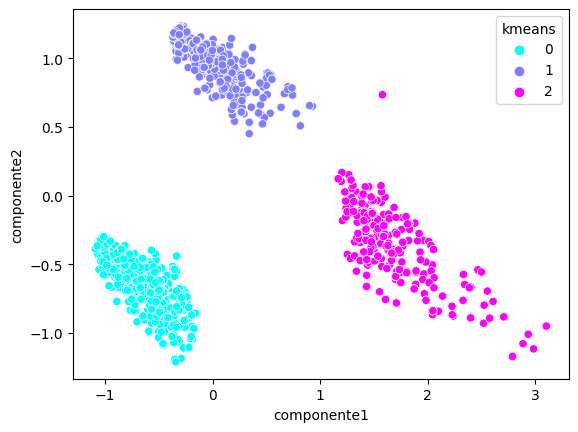

In [386]:
sns.scatterplot(x='componente1', y='componente2', data = df_pca_transform,hue="kmeans", palette="cool")